In [ ]:
# One Hot Encoding
# : 단어를 숫자로 표현하고자 할 때 적용할 수 있는 간단한 방법론. 
# ex) 원숭이 = [0,1,0]
# 각 위치는 해당 단어를 의미함. 
# 한계점 : 차원 크기의 문제
#       -> 단어 수가 많아지면 차원의 수가 급격히 증가함.      
#       -> 사실상 사용하기 어려움. 
# 한계점 2: 의미를 담지 못함. (단어를 사이에 의미를 담지 못함.) 코사인 유사도 참고


# 유사도 계산 (Text Similiarity)
# 1. 유클리디언 거리 : 벡터간 직진거리를 계산 -> 차원 간의 차이
# 2. 자카드 유사도 : 문서 혹은 문장 간 유사도 측정 (겹치는 토큰의 비율) -> 자주 쓰임
# 3. 코사인 유사도 : 두 벡터간 각을 이용한 유사도 측정 -> 1에 가까울 수록 유사도가 높음. 

In [1]:
## TF-IDF, N-gram ##

# TF-IDF : 단어 빈도 - 역문서 빈도
#     : TDM (Term Document Matrix) - 단어 문서 행렬
#  : TDM 내 각 단어의 중요성을 가중치로 표현
#  : TDM을 사용하는 것보다 더 정확하게 문서비교가 가능. 
# tf(d,t), df(d,t), idf(d,t)
#                     -> idf가 높으면 다른 문서에서 많이 등장하지 않은 단어. ex) 30000 / 5 
#                     -> idf는 log를 씌움. 

# N-gram
# : 제한적으로 문맥을 표현할 수 있음. 
# : 몇개의 단어를 함계 보느냐에 따라 bigram, trigram....
# 한계점 : n의 크기는 trade-off
#         -> n은 최대 5를 넘지 않도록 권장

# 적용 분야에 맞는 corpus 수집 (corpus -> 말뭉치)
# : 분야에 따라 단어들의 확률 분포는 다름 (금융 분야, 마케팅 분야)
# : 분야에 적합한 코퍼스를 사용하면 언어 모델의 성능이 높아질 수 있음. 

In [ ]:
## word embedding ##
# : 단어의 의미를 간직하는 밀집 벡터로 표현하는 방법 
# : 좌표로 표현하는 방법 (차원을 추가하지 않음.)
# 한계점 
# -> 차원의 크기는 밀집벡터로 해결했음. 하지만 단어 의미는?
# 분포 가설: 같은 문맥에서 등장하는 단어는 유사한 의미를 지닌다. 
# 1) 임의의 위치에 벡터 생성
# 2) 같은 문맥이 등장하는 단어를 더 가까이 표현 

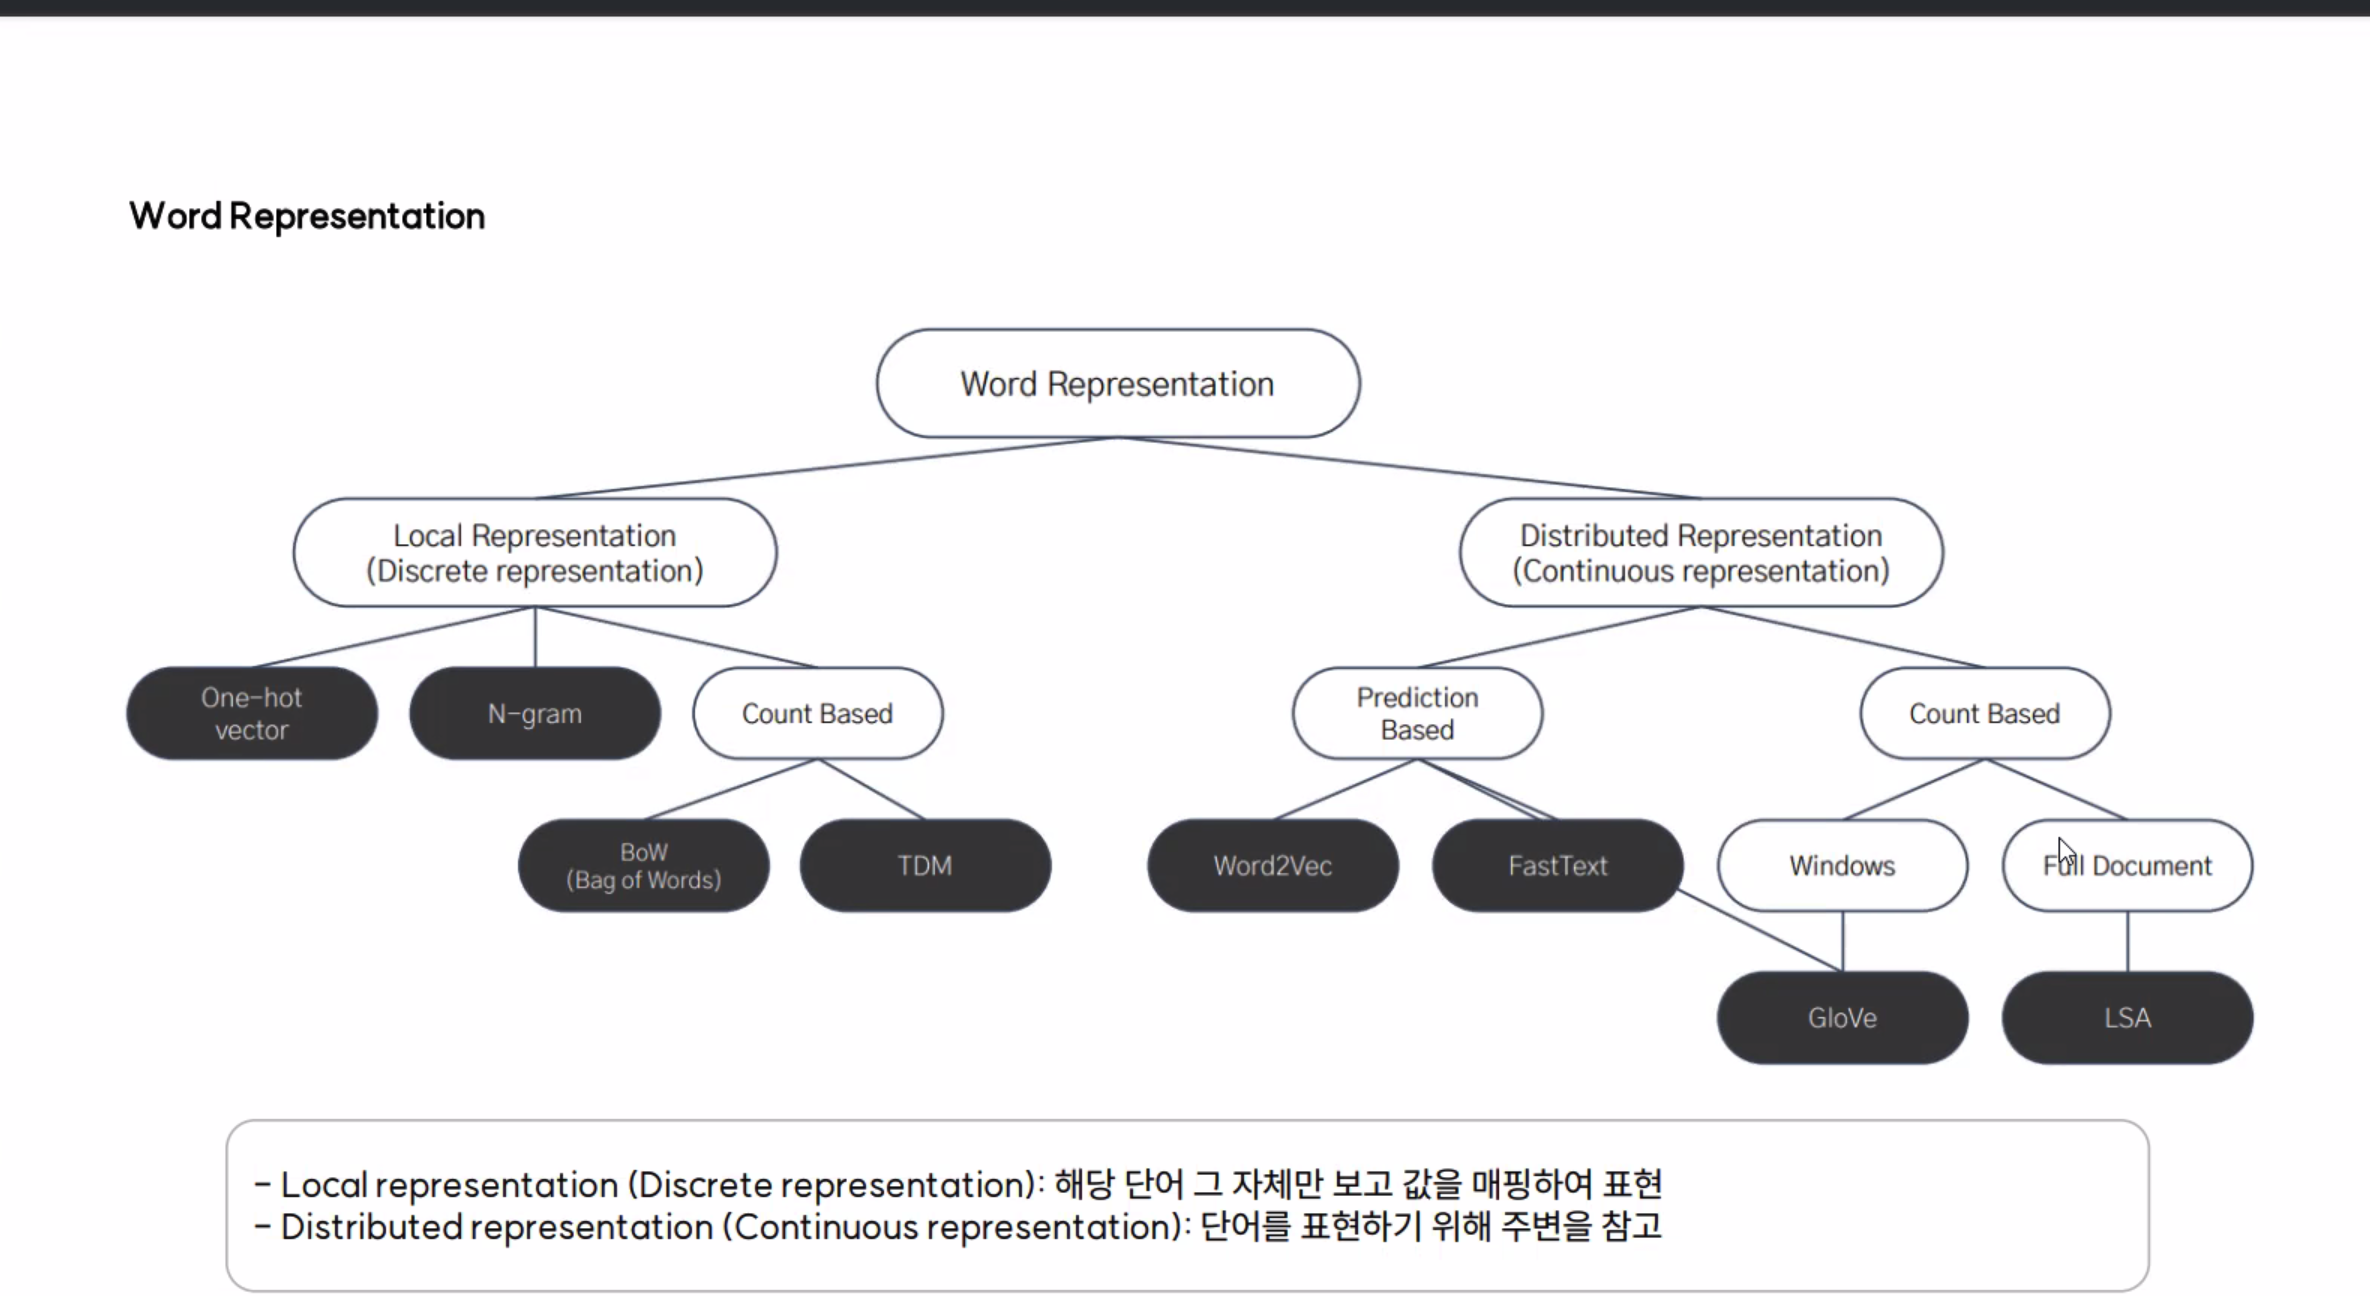

In [2]:
from IPython.display import Image
Image('/Users/wonbinchoi/Desktop/word_representation.png')

In [3]:
word_ls = ['원숭이','바나나','사과','코끼리']

# sklearn을 활용한 one-hot encoding
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터 배열
values = array(word_ls)
print(values)

# 문자열에 숫자를 붙임
label_enc = LabelEncoder()
int_enc = label_enc.fit_transform(values)
print(int_enc)

# binary encode
onehot_enc = OneHotEncoder(sparse=False)
int_enc = int_enc.reshape(len(int_enc), 1) # n:1 matrix로 변환
print(int_enc)
onehot_enc = onehot_enc.fit_transform(int_enc)
print(onehot_enc)

# one-hot encoding 의 첫번째 배열을 값을 역으로 산출
inverted = label_enc.inverse_transform([argmax(onehot_enc[0, :])])
print(inverted)

['원숭이' '바나나' '사과' '코끼리']
[2 0 1 3]
[[2]
 [0]
 [1]
 [3]]
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
['원숭이']


In [5]:
## word representation (feature vectorization)

In [ ]:
# 1. one-hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

word_ls = []
values = np.array(word_ls)

label_enc = LabelEncoder()
label_enc.fit(values)
label_encoded = label_enc.transform(values)

onehot_enc = OneHotEncoder(sparse=False)
int_enc = label_encoded.reshape(len(label_encoded), 1)
onehot_encoded = onehot_enc.fit_transform(int_enc)
print(onehot_encoded)

# 2. CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I love a dog"
corpus = [d1, d2]
cnt_vect = CountVectorizer()
cnt_vect.fit(corpus)
ftr_vect = cnt_vect.transform(corpus)
ftr_vect.toarray() # 단어의 빈도수 기록
cnt_vect.vocabulary_ # 각 단어의 인덱스가 어떻게 부여됬는지를 보여줌.

# 3. TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer]

d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I love a dog"
corpus = [d1, d2]
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(corpus)
ftr_vect = tfidf_vect.transform(corpus)


# 4. LSA 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

d1 = "The cat sat on my face I hate a cat"
d2 = "The dog sat on my bed I love a dog"
corpus = [d1, d2]
doc_ls = [doc.split() for doc in corpus]

cnt_vect = CountVectorizer()
ftr_vect = cnt_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=2, algorithm='randomzied', n_iter=100)
svd.fit(ftr_vect)

features = cnt_vect.get_feature_names() # 단어 집합, 1000개의 단어가 저장됨. 
for i in range(len(features)):
    print ("{} : {}".format(features[i], svd.components_[:, i]))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

doc_ls = [
    '바나나 사과 포도 포도',
    '사과 포도',
    '포도 바나나',
    '짜장면 짬뽕 탕수육',
    '볶음밥 탕수육',
    '짜장면 짬뽕',
    '라면 스시',
    '스시',
    '가츠동 스시 소바',
    '된장찌개 김치찌개 김치',
    '김치 된장',
    '비빔밥 김치'
]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

cnt_vect = CountVectorizer()
ftr_vect = cnt_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100)
svd.fit(ftr_vect)

features = cnt_vect.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.
for i in range(len(features)) :
    print("{} : {}".format(features[i], svd.components_[:,i])) 
                                            # .components_를 찍으면 좌표가 찍히는 것으로 보임
    


가츠동 : [-2.08544991e-16 -6.76141090e-16]
김치 : [-2.52909608e-18 -1.69898243e-14]
김치찌개 : [-1.11194491e-17 -6.83135813e-15]
된장 : [-6.85091114e-18 -4.86016454e-15]
된장찌개 : [ 1.30348666e-17 -6.82640481e-15]
라면 : [ 6.39748333e-17 -4.94147112e-16]
바나나 : [ 4.0824829e-01 -2.1552002e-16]
볶음밥 : [3.30255576e-23 1.27737006e-01]
비빔밥 : [ 1.08141546e-17 -5.23218449e-15]
사과 : [4.08248290e-01 2.18344696e-16]
소바 : [-1.17178664e-16 -6.57301822e-16]
스시 : [ 4.73427781e-18 -1.79538911e-15]
짜장면 : [1.58234949e-22 6.12024764e-01]
짬뽕 : [1.58234949e-22 6.12024764e-01]
탕수육 : [1.25209393e-22 4.84287758e-01]
포도 : [ 8.16496581e-01 -1.41244819e-18]
